# Recommendation System

### Data Description:

### Unique ID of each anime.
### Anime title.
### Anime broadcast type, such as TV, OVA, etc.
### anime genre.
### The number of episodes of each anime.
### The average rating for each anime compared to the number of users who gave ratings.

### Number of community members for each anime.etc.

### Objective:
### The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 

### Dataset:
### Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [2]:
anime = pd.read_csv("anime.csv")
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Tasks:

### Data Preprocessing:tes.

#### Load the dataset into a suitable data structure (e.g., pandas DataFrame).
#### Handle missing values, if any.
#### Explore the dataset to understand its structure and attributes.

In [3]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [5]:
anime = anime.astype({"anime_id" : "category"})
anime.dtypes

anime_id    category
name          object
genre         object
type          object
episodes      object
rating       float64
members        int64
dtype: object

In [6]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
print(anime["genre"].mode())
print(anime["type"].mode())
print(anime["rating"].mode())

0    Hentai
Name: genre, dtype: object
0    TV
Name: type, dtype: object
0    6.0
Name: rating, dtype: float64


In [8]:
anime["genre"].fillna("Hentai", inplace = True)
anime["type"].fillna("TV", inplace = True)
anime["rating"].fillna(6.0, inplace = True)

In [9]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

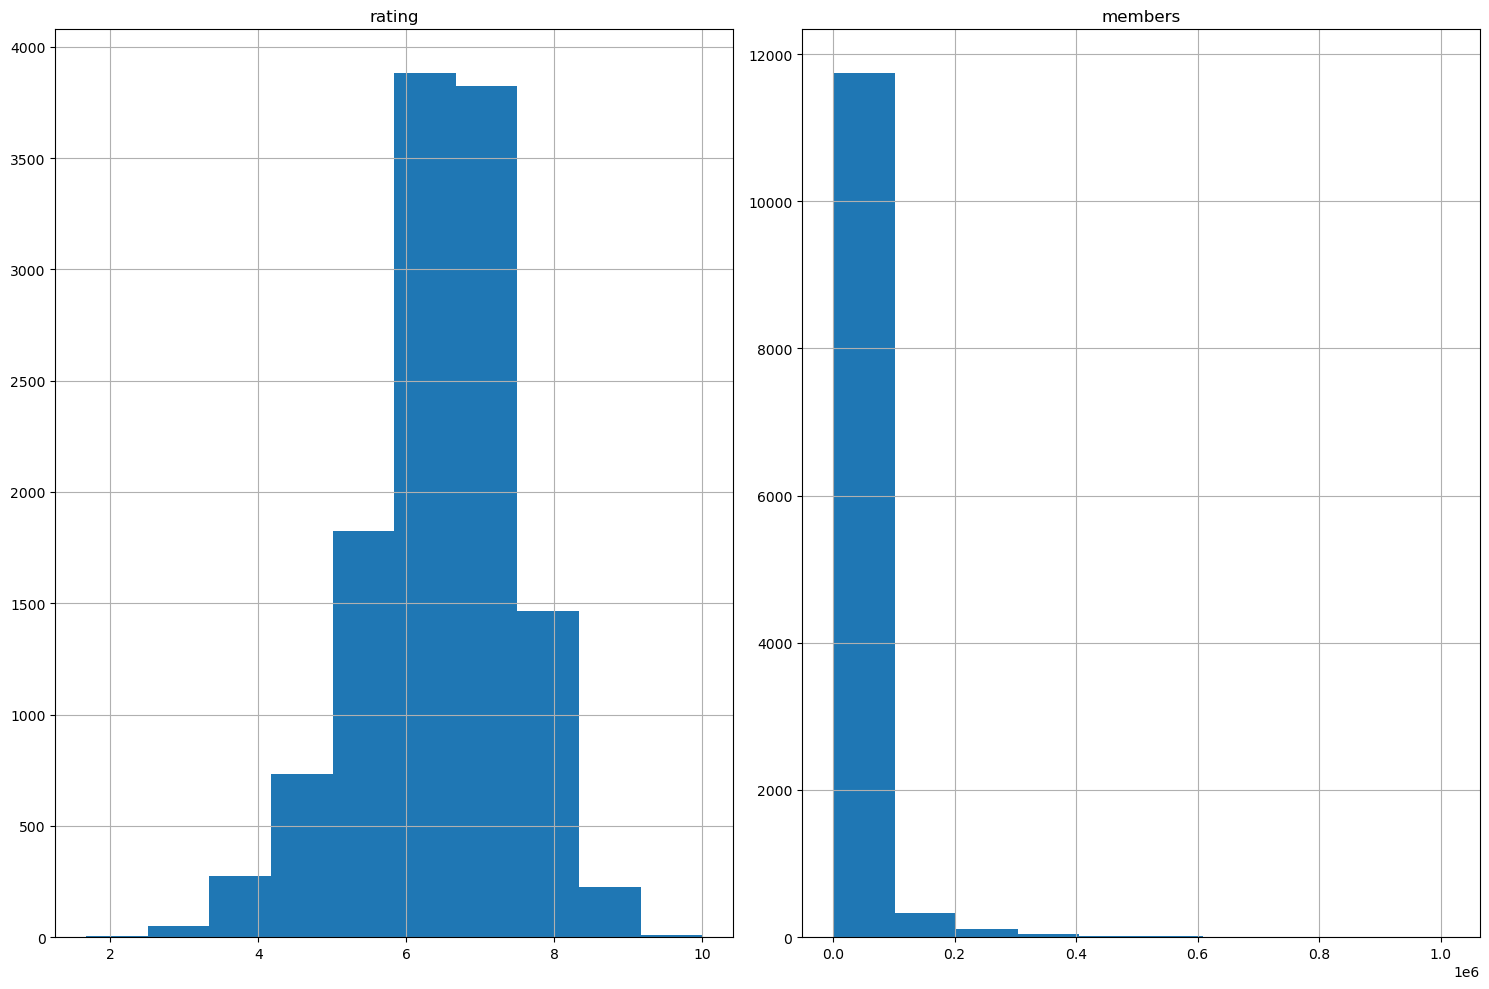

In [10]:
anime.hist(figsize = (15, 10))
plt.tight_layout()
plt.show()

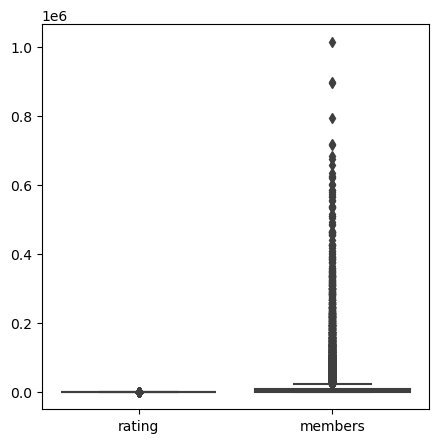

In [11]:
plt.figure(figsize = (5, 5))
sns.boxplot(anime)
plt.show()

In [12]:
len(anime.genre.unique())

3264

In [13]:
len(anime.type.unique())

6

In [14]:
user_item_anime_matrix = anime.pivot(index = "anime_id",
                                          columns = "genre",
                                          values = "rating").reset_index()
user_item_anime_matrix

genre,anime_id,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12290,34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12291,34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12292,34525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
user_item_anime_matrix.dtypes

genre
anime_id                                                   category
Action                                                      float64
Action, Adventure                                           float64
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen            float64
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports     float64
                                                             ...   
Super Power, Supernatural, Vampire                          float64
Supernatural                                                float64
Thriller                                                    float64
Vampire                                                     float64
Yaoi                                                        float64
Length: 3265, dtype: object

In [16]:
user_item_anime_matrix.isnull().sum()

genre
anime_id                                                       0
Action                                                     12241
Action, Adventure                                          12279
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen           12292
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports    12293
                                                           ...  
Super Power, Supernatural, Vampire                         12293
Supernatural                                               12280
Thriller                                                   12293
Vampire                                                    12293
Yaoi                                                       12291
Length: 3265, dtype: int64

In [17]:
user_item_anime_matrix.fillna("0", inplace = True)

In [18]:
from sklearn.metrics import pairwise_distances
user_sim = 1 - pairwise_distances( user_item_anime_matrix.values,metric='cosine')
user_sim

array([[1.        , 0.05762219, 0.06589538, ..., 0.11265691, 0.11265691,
        0.11265691],
       [0.05762219, 1.        , 0.29917761, ..., 0.51148385, 0.51148385,
        0.51148385],
       [0.06589538, 0.29917761, 1.        , ..., 0.5849209 , 0.5849209 ,
        0.5849209 ],
       ...,
       [0.11265691, 0.51148385, 0.5849209 , ..., 1.        , 0.99999997,
        0.99999997],
       [0.11265691, 0.51148385, 0.5849209 , ..., 0.99999997, 1.        ,
        0.99999997],
       [0.11265691, 0.51148385, 0.5849209 , ..., 0.99999997, 0.99999997,
        1.        ]])

In [19]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,1.000000,0.057622,0.065895,0.077639,0.084468,0.099183,0.100308,0.102530,0.102434,0.102389,...,0.112657,0.112657,0.112657,0.112657,0.112657,0.112657,0.112657,0.112657,0.112657,0.112657
1,0.057622,1.000000,0.299178,0.352496,0.383502,0.450308,0.455417,0.465506,0.465070,0.464864,...,0.511484,0.511484,0.511484,0.511484,0.511484,0.511484,0.511484,0.511484,0.511484,0.511484
2,0.065895,0.299178,1.000000,0.403106,0.438564,0.514962,0.520805,0.532342,0.531843,0.531607,...,0.584921,0.584921,0.585062,0.584921,0.584921,0.584921,0.584921,0.584921,0.584921,0.584921
3,0.077639,0.352496,0.403106,1.000000,0.516723,0.606736,0.613620,0.627214,0.626626,0.626348,...,0.689163,0.689163,0.689163,0.689163,0.689163,0.689163,0.689163,0.689163,0.689163,0.689163
4,0.084468,0.383502,0.438564,0.516723,1.000000,0.660106,0.667595,0.682385,0.681745,0.681443,...,0.749783,0.749783,0.749783,0.749783,0.749783,0.749783,0.749783,0.749783,0.749783,0.749783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.112657,0.511484,0.584921,0.689163,0.749783,0.880396,0.890385,0.910110,0.909256,0.908853,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
12290,0.112657,0.511484,0.584921,0.689163,0.749783,0.880396,0.890385,0.910110,0.909256,0.908853,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
12291,0.112657,0.511484,0.584921,0.689163,0.749783,0.880396,0.890385,0.910110,0.909256,0.908853,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
12292,0.112657,0.511484,0.584921,0.689163,0.749783,0.880396,0.890385,0.910110,0.909256,0.908853,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#Set the index and column names to user ids 
user_sim_df.index = anime.anime_id.unique()
user_sim_df.columns = anime.anime_id.unique()

In [22]:
user_sim_df.iloc[0:5, 0:5]

,32281,5114,28977,9253,9969
32281,1.000000,0.057622,0.065895,0.077639,0.084468
5114,0.057622,1.000000,0.299178,0.352496,0.383502
28977,0.065895,0.299178,1.000000,0.403106,0.438564
9253,0.077639,0.352496,0.403106,1.000000,0.516723
9969,0.084468,0.383502,0.438564,0.516723,1.000000


In [24]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,32281,5114,28977,9253,9969
32281,0.000000,0.057622,0.065895,0.077639,0.084468
5114,0.057622,0.000000,0.299178,0.352496,0.383502
28977,0.065895,0.299178,0.000000,0.403106,0.438564
9253,0.077639,0.352496,0.403106,0.000000,0.516723
9969,0.084468,0.383502,0.438564,0.516723,0.000000


In [25]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

32281     8800
5114     32713
28977      868
9253     32713
9969     12413
dtype: int64

In [27]:
anime[(anime['anime_id']==32281) | (anime['anime_id']==8800)]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
3456,8800,Senkou no Night Raid Specials,"Action, Historical, Military, Super Power",Special,3,6.99,3667


In [28]:
anime[(anime['anime_id']==5114) | (anime['anime_id']==32713)]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
12276,32713,Original C-V-P Momoko,Hentai,OVA,2,4.00,66


In [29]:
anime[(anime['anime_id']==28977) | (anime['anime_id']==868)]

,anime_id,name,genre,type,episodes,rating,members
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1917,868,Slayers Great,"Adventure, Comedy, Fantasy, Magic, Shounen",Movie,1,7.41,12760
